In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
print('Import Complete')

Import Complete


In [35]:
apps = pd.read_csv('/Users/Jkovach/Downloads/google-play-store-apps/googleplaystore.csv', encoding = 'ISO-8859-1')
print(apps.head(n=5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ÛÒ FREE Live Cool Themes, Hid...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free  0.00       Everyone   
1     967   14M     500,000+  Free  0.00       Everyone   
2   87510  8.7M   5,000,000+  Free  0.00       Everyone   
3  215644   25M  50,000,000+  Free  0.00           Teen   
4     967  2.8M     100,000+  Free  0.00       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and up  
1  Art &

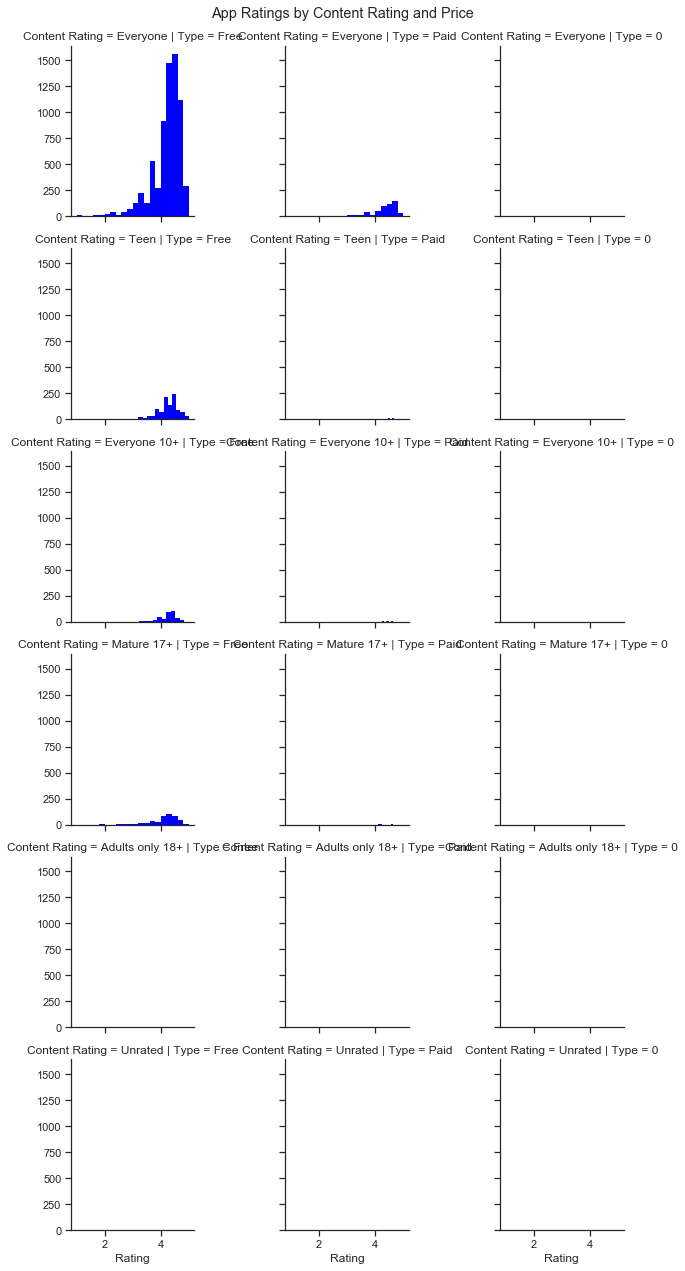

In [4]:
#Showing the information in a seaborn facet grid
sns.set(style='ticks') #Preset aesthetic

#Tell seaborn about data structure
g = sns.FacetGrid(apps, row='Content Rating', col='Type')
#Name the plot type and the variable to be plotted using the created structure
g.map(plt.hist, 'Rating', color='blue', lw=0, bins=20)
#Create space for titles
plt.subplots_adjust(top=.95)
#Title informative axis name
g.set_axis_labels('Rating')
plt.suptitle('App Ratings by Content Rating and Price')
#Remove excess lines around plot
sns.despine(trim=False)
plt.show()

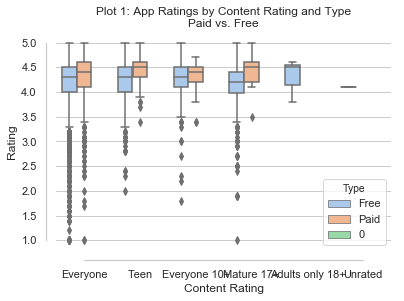

In [6]:
#Comparing groups again, but with a different emphasis.
#Setting the overall aesthetic.
sns.set(style="whitegrid")
ax = sns.boxplot(x='Content Rating',y='Rating',hue='Type',data=apps,palette='pastel')  
plt.title('Plot 1: App Ratings by Content Rating and Type\nPaid vs. Free')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Content Rating', ylabel='Rating')
plt.show()

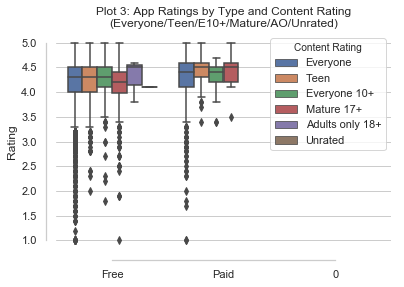

In [8]:
#Compare using boxplots
ax = sns.boxplot(x='Type', y='Rating', hue='Content Rating', data=apps)
plt.title('Plot 3: App Ratings by Type and Content Rating\n(Everyone/Teen/E10+/Mature/AO/Unrated)')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Rating')

plt.show()

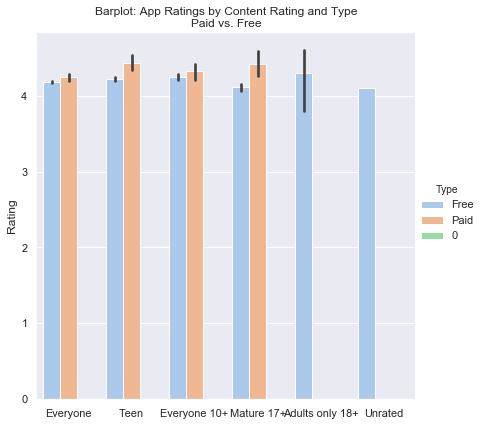

In [9]:
#Set new aesthetic
sns.set(style='darkgrid')

g = sns.catplot(x='Content Rating', y='Rating', hue='Type', data=apps,
               height=6, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set_ylabels('Rating')
g.set_xlabels('')
plt.title('Barplot: App Ratings by Content Rating and Type\nPaid vs. Free')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2853bb00>]],
      dtype=object)

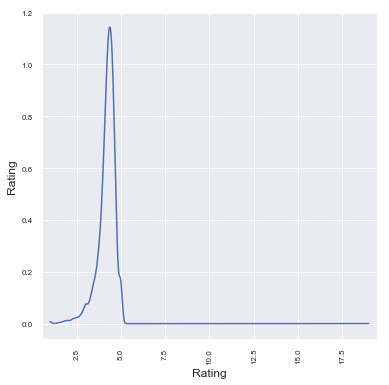

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(apps, alpha = 0.2, figsize = (6, 6), diagonal='kde')

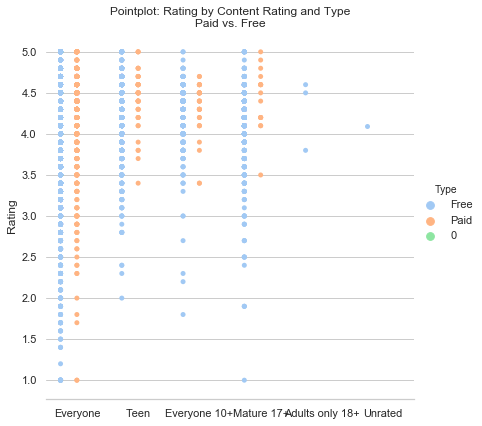

In [20]:
sns.set(style="whitegrid")

g = sns.catplot(x="Content Rating", y="Rating", hue="Type", data=apps,
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True,jitter=False)
g.despine(left=True)
g.set_ylabels("Rating")
g.set_xlabels("")
plt.title('Pointplot: Rating by Content Rating and Type\nPaid vs. Free')
plt.show()

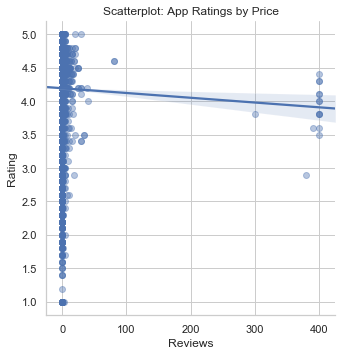

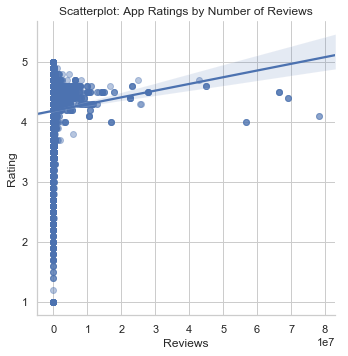

In [70]:
apps['Reviews_int'] = pd.to_numeric(apps['Reviews'], errors = 'coerce')
apps['price_int'] = pd.to_numeric(apps['Price'], errors = 'coerce')


g = sns.lmplot(y='Rating',
               x='price_int',
               data=apps,
               fit_reg=True,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Reviews")
plt.title('Scatterplot: App Ratings by Price')
plt.show()

g = sns.lmplot(y='Rating',
               x='Reviews_int',
               data=apps,
               fit_reg=True,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Reviews")
plt.title('Scatterplot: App Ratings by Number of Reviews')
plt.show()

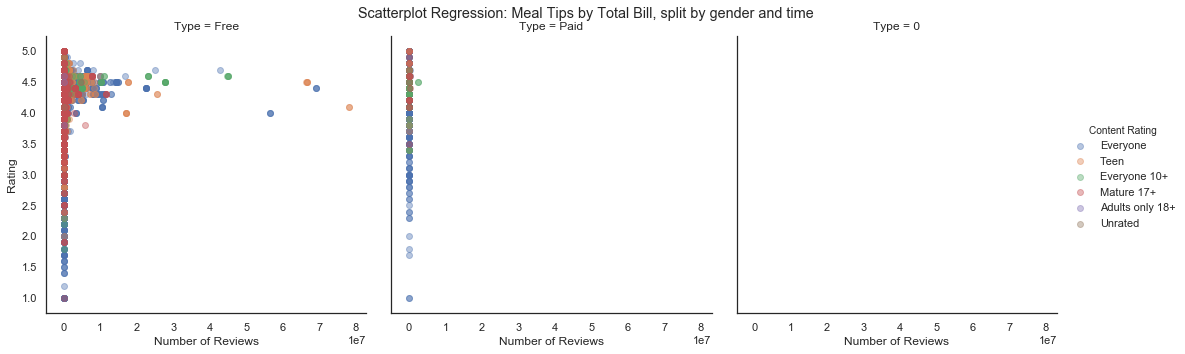

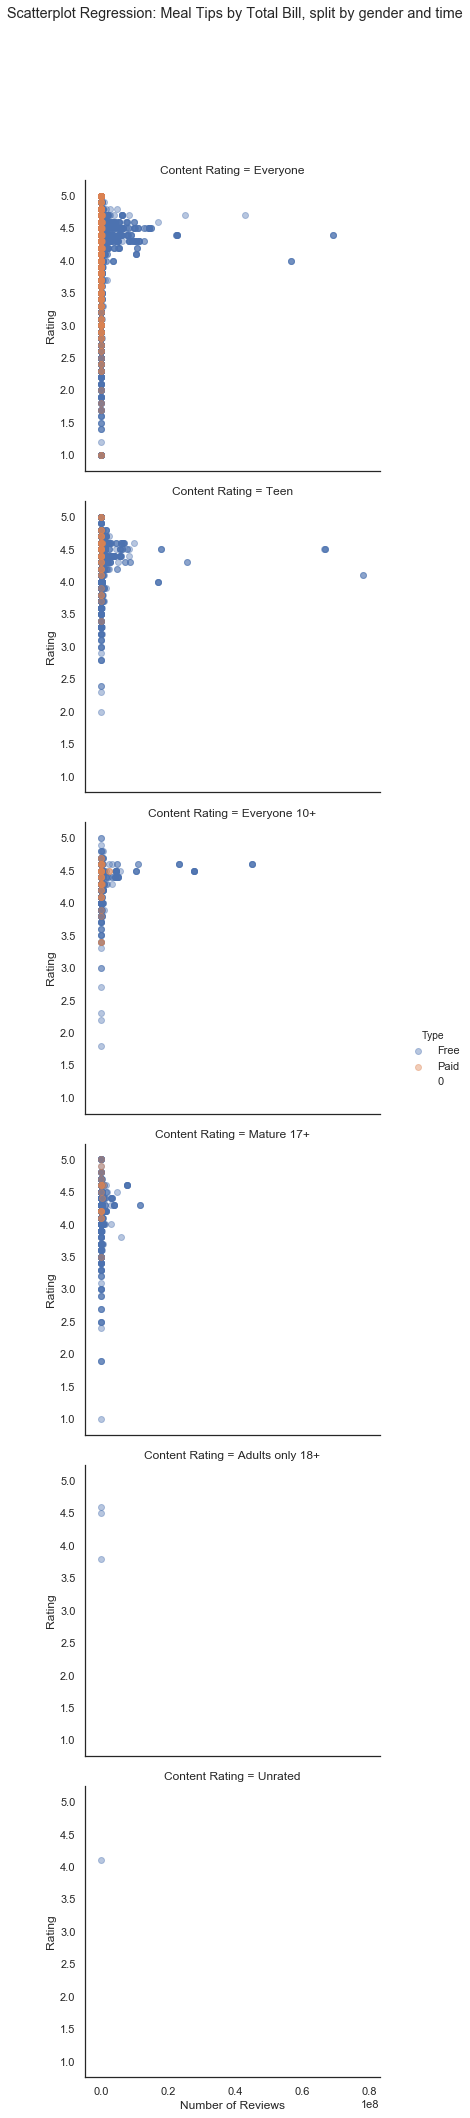

In [77]:
sns.set(style="white")

g = sns.lmplot(y='Rating', 
               x='Reviews_int',
               hue='Content Rating',
               data=apps,
               col='Type',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Number of Reviews")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Rating', 
               x='Reviews_int',
               hue='Type',
               data=apps,
               row='Content Rating',
               fit_reg=False,
               ci=95,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Number of Reviews")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

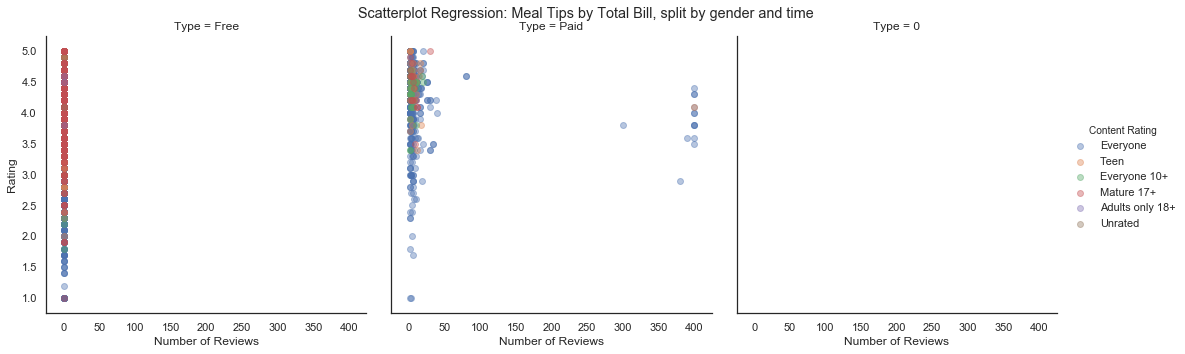

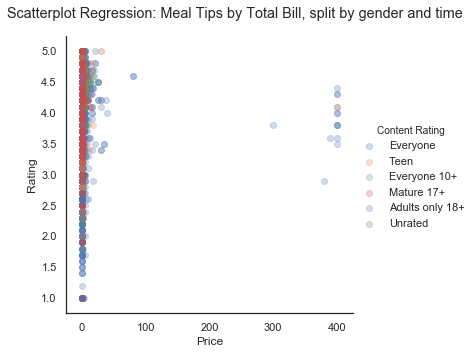

In [81]:
sns.set(style="white")

g = sns.lmplot(y='Rating', 
               x='price_int',
               hue='Content Rating',
               data=apps,
               col='Type',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Rating")
g.set_xlabels("Number of Reviews")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Rating', 
               x='price_int',
               hue='Content Rating',
               data=apps,
               fit_reg=False,
               ci=95,
               scatter_kws={'alpha':0.25})
g.set_ylabels("Rating")
g.set_xlabels("Price")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()